<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **Ïù¥Î≥ÄÎüâ Î∂ÑÏÑù ‚ë¢ - Î≤îÏ£ºÌòï  ‚Üí Î≤îÏ£ºÌòï**

- ÏãúÍ∞ÅÌôîÏôÄ ÏàòÏπòÌôî Î∞©Î≤ïÏúºÎ°ú Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï©ÎãàÎã§.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_03.png' width=600 align='left'/>

## **1. ÌôòÍ≤ΩÏ§ÄÎπÑ**

- ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ Î∂ÑÏÑù ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ÏòµÎãàÎã§.

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Diabetes Îç∞Ïù¥ÌÑ∞
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes2.csv'
diabetes = pd.read_csv(path)
diabetes.head()

Pregnancies  Glucose  BloodPressure BPStatus  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0   Normal           35.0      NaN  33.6   
1            1     85.0           66.0   Normal           29.0      NaN  26.6   
2            8    183.0           64.0   Normal            NaN      NaN  23.3   
3            1     89.0           66.0   Normal           23.0     94.0  28.1   
4            0    137.0           40.0      Low           35.0    168.0  43.1   

    BMIStatus  DiabetesPedigreeFunction   Age  Outcome  
0       Obese                     0.627  50.0        1  
1  Overweight                     0.351  31.0        0  
2      Normal                     0.672  32.0        1  
3  Overweight                     0.167  21.0        0  
4       Obese                     2.288  33.0        1

## **2. ÍµêÏ∞®Ìëú**

- Î≤îÏ£º vs Î≤îÏ£º Î•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî PandasÏùò **crosstab()** Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ **ÍµêÏ∞®Ìëú**Î•º Î®ºÏ†Ä ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§.
- **BMIStatus ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Ïñ¥Î¥ÖÎãàÎã§.

In [3]:
pd.crosstab(diabetes['BMIStatus'], diabetes['Outcome'])

Outcome        0    1
BMIStatus            
Normal        95    7
Obese        253  219
Overweight   139   40
Underweight    4    0

- Ï∞∏Í≥†Î°ú, ÏúÑ ÍµêÏ∞®ÌëúÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ groupby() Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÏßëÍ≥ÑÌïú ÌõÑ pivot ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïú Í≤ÉÍ≥º Í∞ôÏäµÎãàÎã§.

In [4]:
tmp = diabetes.groupby(by=['BMIStatus', 'Outcome'], as_index=False).size()
tmp.columns = ['BMIStatus', 'Outcome', 'Cnt']
tmp.pivot(index='BMIStatus', columns='Outcome', values='Cnt').fillna(0).astype(int)

Outcome        0    1
BMIStatus            
Normal        95    7
Obese        253  219
Overweight   139   40
Underweight    4    0

- **BPStatus ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Ïñ¥Î¥ÖÎãàÎã§.

In [5]:
pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'])

Outcome     0    1
BPStatus          
High      115   90
Low        70   16
Normal    296  146

- ÍµêÏ∞®ÌëúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ **normalize** Îß§Í∞úÎ≥ÄÏàò Í∞íÏóê Îî∞Îùº Îã§Î•∏ Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
    - 'index': Í∞Å ÌñâÏùò Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Í∞Å ÌñâÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Í∞Å ÌñâÏùò Ìï©Ïù¥ 1Ïù¥ Îê®).
    - 'columns': Í∞Å Ïó¥Ïùò Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Í∞Å Ïó¥Ïùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Í∞Å Ïó¥Ïù¥ Ìï©Ïù¥ 1Ïù¥ Îê®).
    - 'all': Ï†ÑÏ≤¥ Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Í∞Å ÏÖÄÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Ï†ÑÏ≤¥ Ìï©Ïù¥ 1Ïù¥ Îê®).

<img src='https://raw.githubusercontent.com/Jangrae/img/master/cross02.png' width=700 align='left'/>


- **BPStatus ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º ÍµêÏ∞®ÌëúÎ°ú normalize Îß§Í∞úÎ≥ÄÏàò Í∞íÏùÑ Î∞îÍøîÍ∞ÄÎ©¥ÏÑú ÌëúÏãúÌï¥Î¥ÖÎãàÎã§.

In [6]:
pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'], normalize='columns')

Outcome          0         1
BPStatus                    
High      0.239085  0.357143
Low       0.145530  0.063492
Normal    0.615385  0.579365

In [7]:
pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'], normalize='index')

Outcome          0         1
BPStatus                    
High      0.560976  0.439024
Low       0.813953  0.186047
Normal    0.669683  0.330317

In [8]:
pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'], normalize='all')

Outcome          0         1
BPStatus                    
High      0.156889  0.122783
Low       0.095498  0.021828
Normal    0.403820  0.199181

## **3. ÏãúÍ∞ÅÌôî**

- Îã§ÏùåÍ≥º Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Î≤îÏ£ºÌòï ‚Üí Î≤îÏ£ºÌòï ÎπÑÍµêÎ•º ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.
    -  100% Stacked Bar
    -  Mosaic Plot


- ÏúÑ Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏúºÎ°ú **BMIStatus ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï¥ÏÑú ÎπÑÍµêÌï¥ Î¥ÖÎãàÎã§.

**1) 100% Stacked Bar**

- Ïö∞ÏÑ† **normalize='index'** Î•º ÏÑ§Ï†ïÌïú ÍµêÏ∞®ÌëúÎ•º ÏûëÏÑ±Ìï©ÎãàÎã§.
- BMIStatus Î≥ÄÏàòÍ∞Ä ÎÑ§ Í∞úÏùò Î≤îÏ§èÍ∞íÏùÑ Í∞ÄÏßÄÎØÄÎ°ú ÎÑ§ Í∞úÏùò ÌñâÏù¥ ÏÉùÍπÅÎãàÎã§.
- normalize='index'Î•º ÏßÄÏ†ïÌñàÏúºÎØÄÎ°ú Í∞Å ÌñâÏùò Ìï©ÏùÄ 1Ïù¥ Îê©ÎãàÎã§.

In [9]:
table = pd.crosstab(diabetes['BMIStatus'], diabetes['Outcome'], normalize='index')
table

Outcome             0         1
BMIStatus                      
Normal       0.931373  0.068627
Obese        0.536017  0.463983
Overweight   0.776536  0.223464
Underweight  1.000000  0.000000

- ÏúÑ ÍµêÏ∞®ÌëúÏóê ÎåÄÌï¥ Stacked BarÎ•º Í∑∏Î¶ΩÎãàÎã§.
- Stacked BarÎäî PandasÏùò **plot()** Î©îÏÜåÎìúÎ°ú ÏâΩÍ≤å Í∑∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.
- Í∞Å ÌñâÎ≥ÑÎ°ú Stacked BarÍ∞Ä Í∑∏Î†§ÏßÄÎ©∞, Í∞Å ÌñâÏùò Ìï©Ïù¥ 1Ïù¥ÎØÄÎ°ú Í∞ôÏùÄ ÎÜíÏù¥Î•º Í∞ñÏäµÎãàÎã§.
- Í∑∏ÎûòÏÑú 100% Stacked Bar ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.
- **axhline()** Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Outcome Ïó¥ ÌèâÍ∑†ÏùÑ ÌëúÏãúÌïòÎäî Í∞ÄÎ°úÏÑ†ÎèÑ ÌëúÏãúÌï¥Î¥ÖÎãàÎã§.
- Outcome Ïó¥ ÌèâÍ∑†, Ï¶â diabetes['Outcome'].mean()ÏùÄ ÎãπÎá®Î≥ëÎ∞úÏÉùÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- Í∑∏Îü∞Îç∞ Stacked Bar ÌïòÎã®Ïù¥ Ï†ïÏÉÅ(Outcome=0)ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- Í∑∏ÎûòÏÑú ÏùºÍ¥ÄÎêú ÌëúÏãúÎ•º ÏúÑÌï¥ 1 - diabetes['Outcome'].mean() ÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

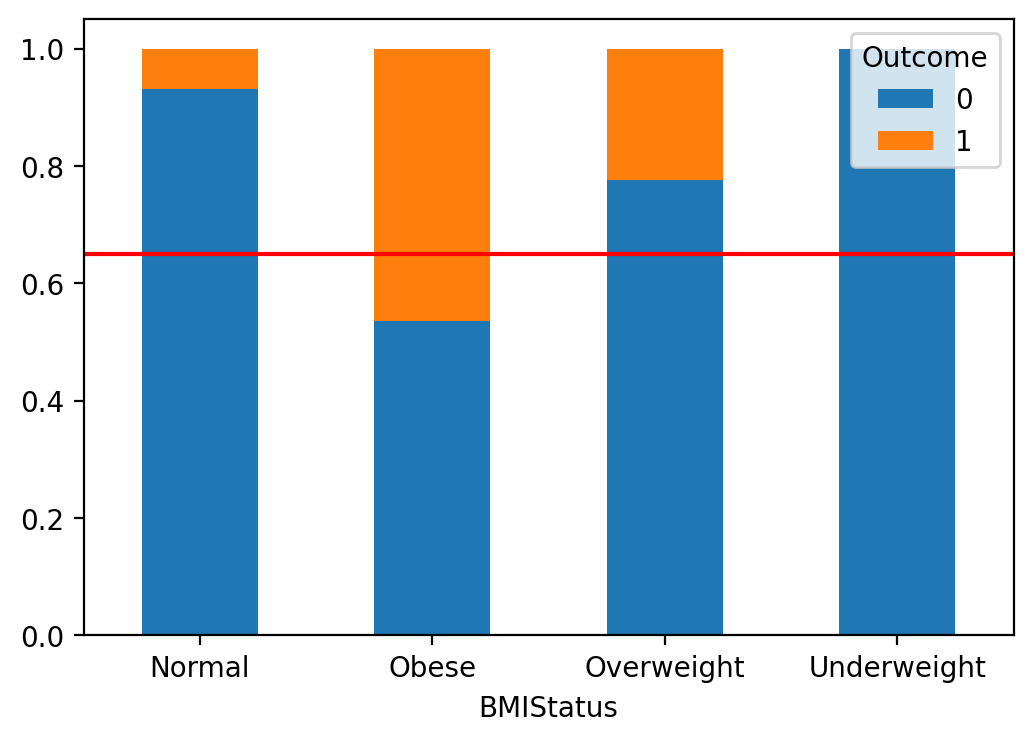

In [10]:
table.plot(kind='bar', stacked=True)

plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

- MatplotlibÏùò bar() Ìï®ÏàòÎ°ú Í∑∏Î¶¥ Ïàò ÏûàÏßÄÎßå ÏïΩÍ∞Ñ Î≥µÏû°Ìï©ÎãàÎã§.

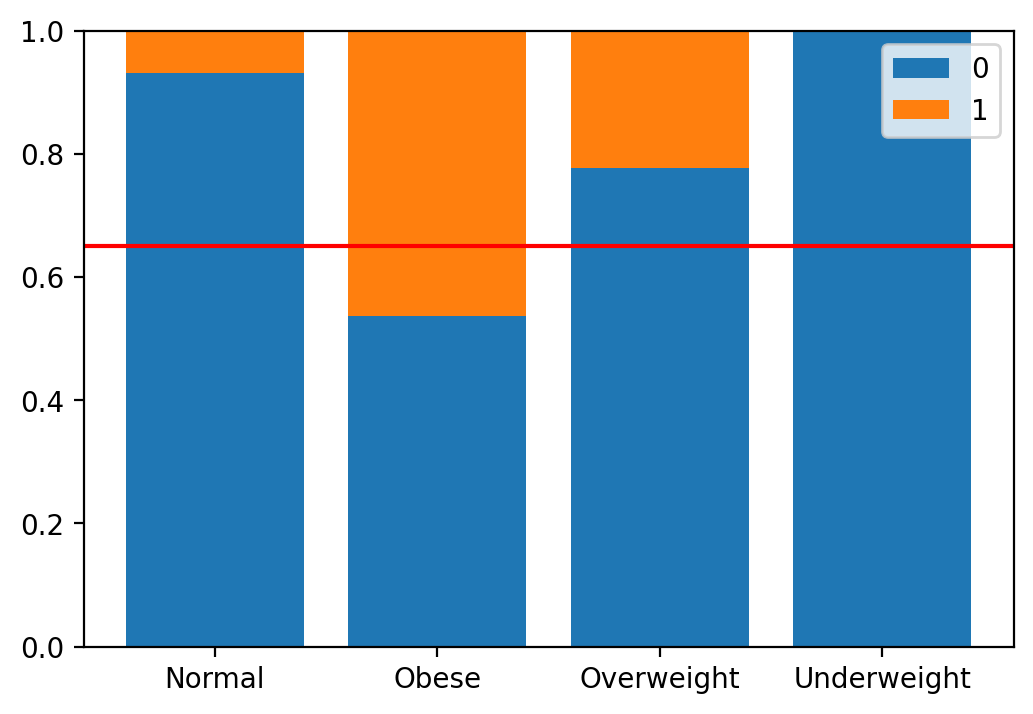

In [11]:
plt.bar(table.index.astype(str), table[0])
plt.bar(table.index.astype(str), table[1], bottom=table[0])
plt.legend(['0', '1'])
plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.show()

Outcome          0         1
BPStatus                    
High      0.560976  0.439024
Low       0.813953  0.186047
Normal    0.669683  0.330317

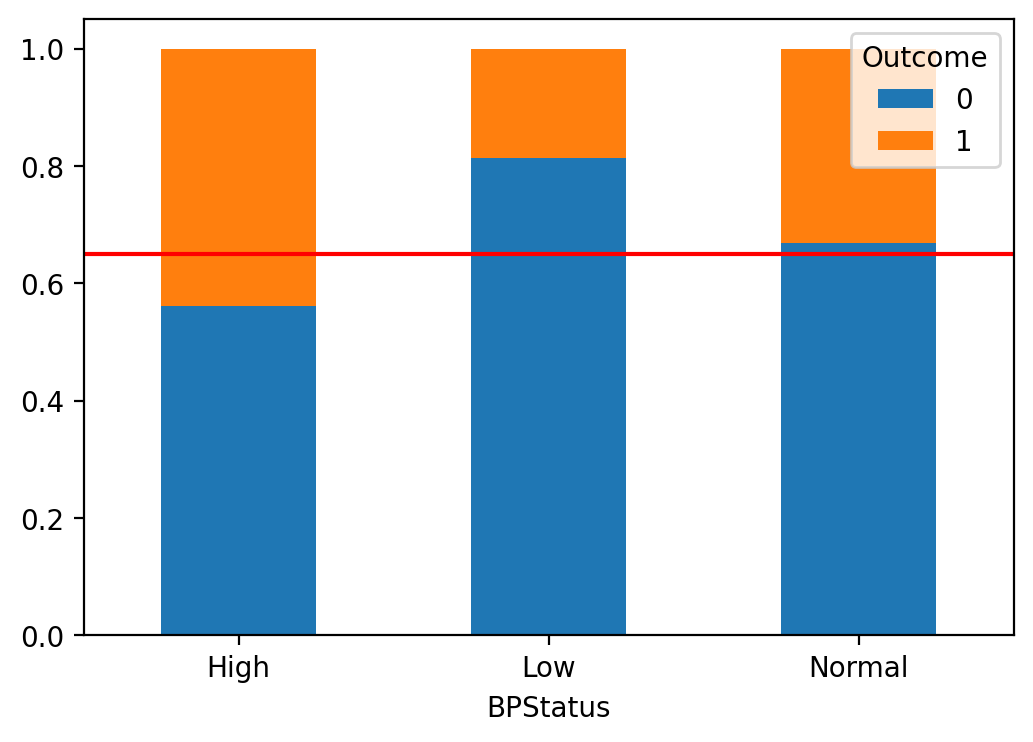

In [12]:
table = pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

1Ô∏è‚É£ diabetes Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê AgeGroup Ïó¥ÏùÑ Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî.

In [17]:
diabetes['AgeGroup'] = diabetes['Age'] // 10 * 10
diabetes['AgeGroup'] = diabetes['AgeGroup'].astype(int)
diabetes.head()

Pregnancies  Glucose  BloodPressure BPStatus  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0   Normal           35.0      NaN  33.6   
1            1     85.0           66.0   Normal           29.0      NaN  26.6   
2            8    183.0           64.0   Normal            NaN      NaN  23.3   
3            1     89.0           66.0   Normal           23.0     94.0  28.1   
4            0    137.0           40.0      Low           35.0    168.0  43.1   

    BMIStatus  DiabetesPedigreeFunction   Age  Outcome  AgeGroup  
0       Obese                     0.627  50.0        1        50  
1  Overweight                     0.351  31.0        0        30  
2      Normal                     0.672  32.0        1        30  
3  Overweight                     0.167  21.0        0        20  
4       Obese                     2.288  33.0        1        30

**2Ô∏è‚É£ AgeGroup ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï¥ Î∂ÑÏÑùÌïòÏÑ∏Ïöî.

In [19]:
pd.crosstab(diabetes['AgeGroup'], diabetes['Outcome'])
table = pd.crosstab(diabetes['AgeGroup'], diabetes['Outcome'], normalize='index')
table

Outcome          0         1
AgeGroup                    
20        0.787879  0.212121
30        0.539394  0.460606
40        0.449153  0.550847
50        0.403509  0.596491
60        0.724138  0.275862
70        0.500000  0.500000
80        1.000000  0.000000

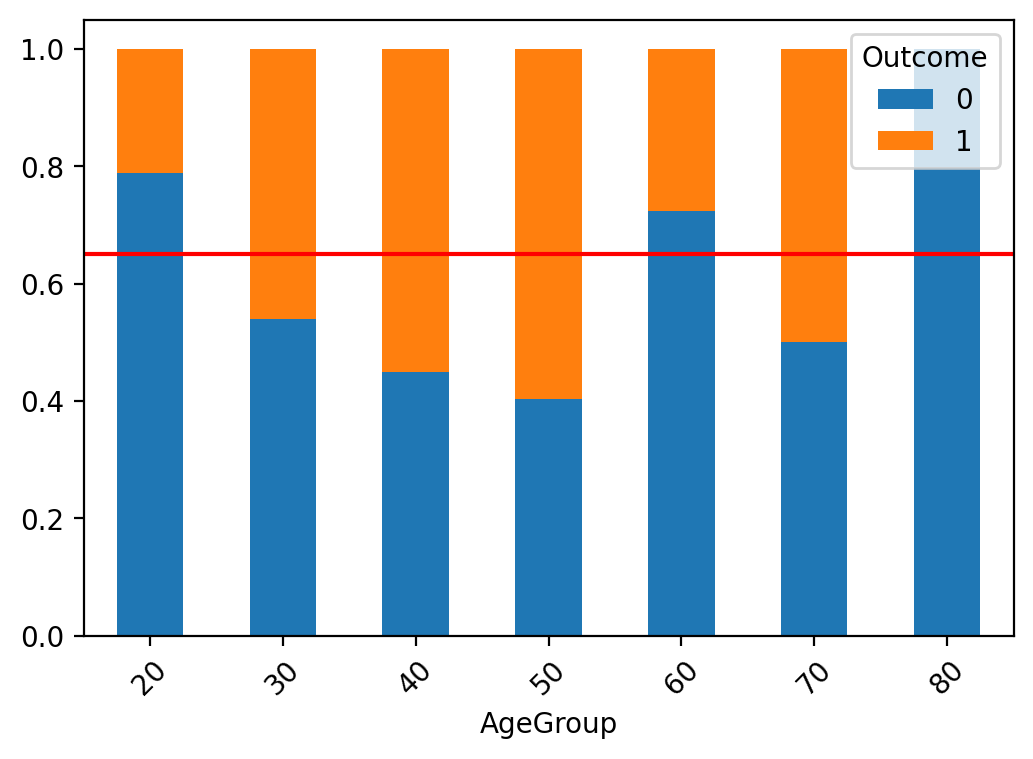

In [ ]:
table.plot(kind='bar', stacked=True)

plt.axhline(1-diabetes['Outomcome'].mean(), color='r')
plt.xticks(rotation=45)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**2) Mosaic Plot**

- 100% Stacked BarÎäî ÎπÑÏú®Îßå ÎπÑÍµêÌïòÎØÄÎ°ú ÏñëÏóê ÎåÄÌïú ÎπÑÍµêÎäî Ìï† Ïàò ÏóÜÏäµÎãàÎã§.
- Mosaic PlotÏúºÎ°ú **ÏñëÏóê ÎåÄÌïú ÎπÑÍµê**Î•º Ìï¥Î¥ÖÎãàÎã§.
- **statsmodels.graphics.mosaicplot**Ïùò **mosaic()** Ìï®ÏàòÎ°ú Mosaic PlotÏùÑ Í∑∏Î¶ΩÎãàÎã§.

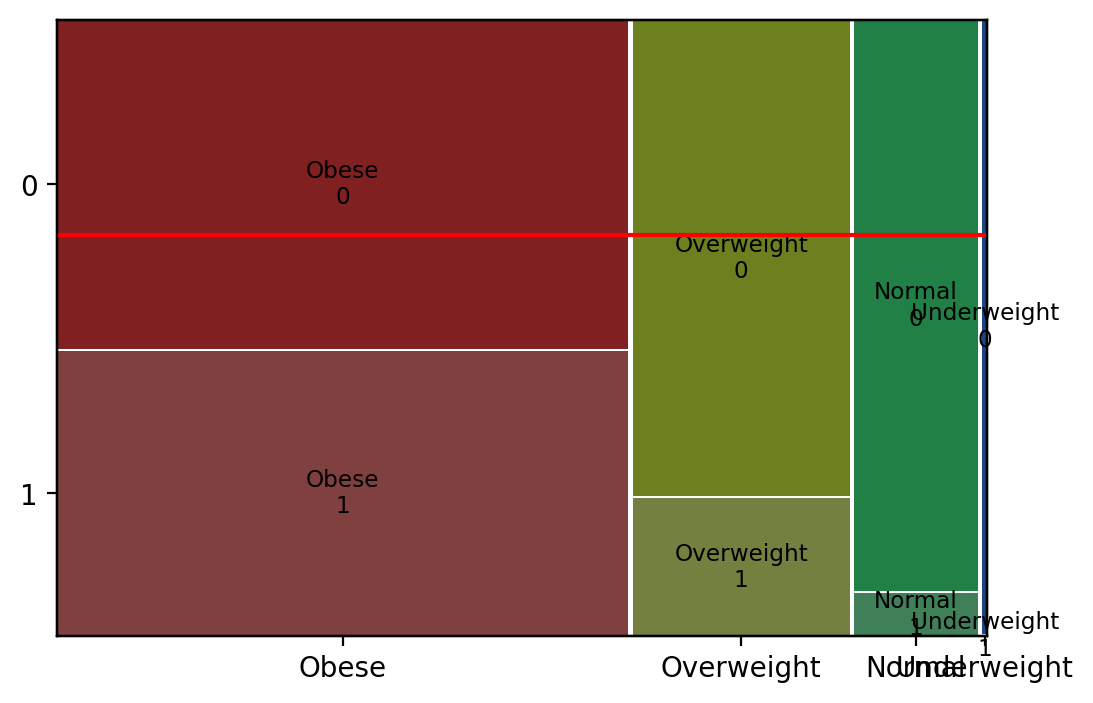

In [22]:
mosaic(diabetes, ['BMIStatus', 'Outcome'])
plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏùò xÏ∂ï Í∏∏Ïù¥Îäî BMIÏàòÏ§ÄÎ≥Ñ ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.  
- yÏ∂ï Í∏∏Ïù¥Îäî BMIÏàòÏ§ÄÎ≥Ñ ÎãπÎá®Î≥ëÌôòÏûê ÎπÑÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

diabetes Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îã§Ïùå Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Mosaic Plot ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

**1Ô∏è‚É£ BPStatus ‚Üí Outcome**

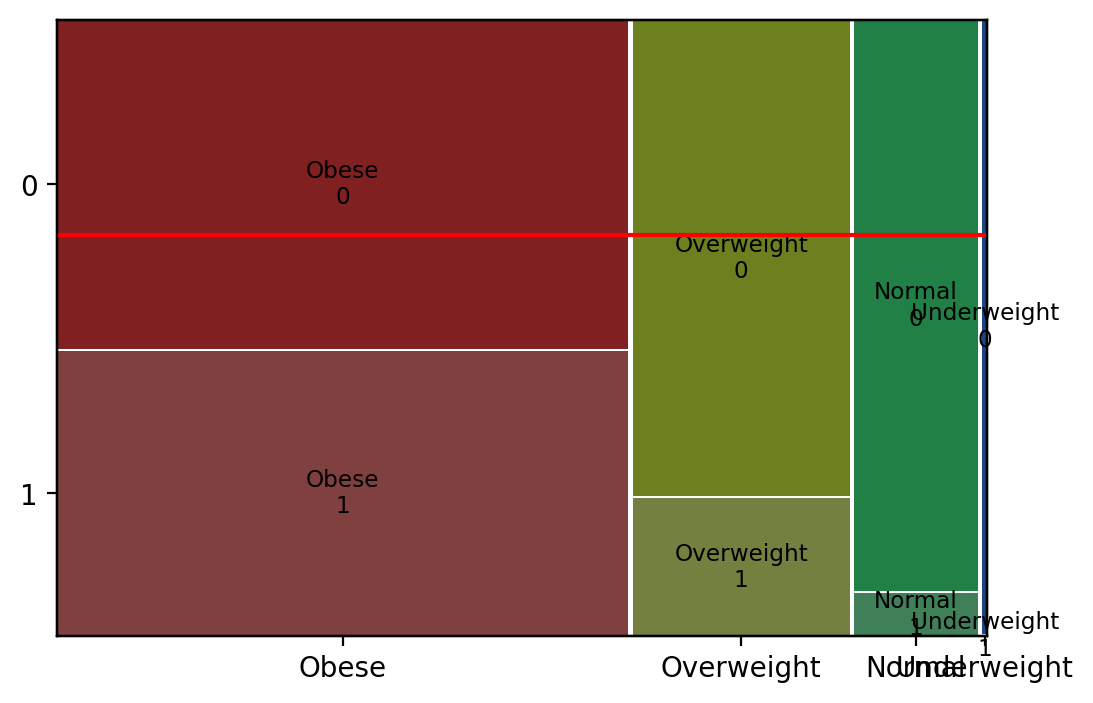

In [23]:
mosaic(diabetes, ['BMIStatus', 'Outcome'])
plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.show()

**2Ô∏è‚É£ AgeGroup ‚Üí Outcome**

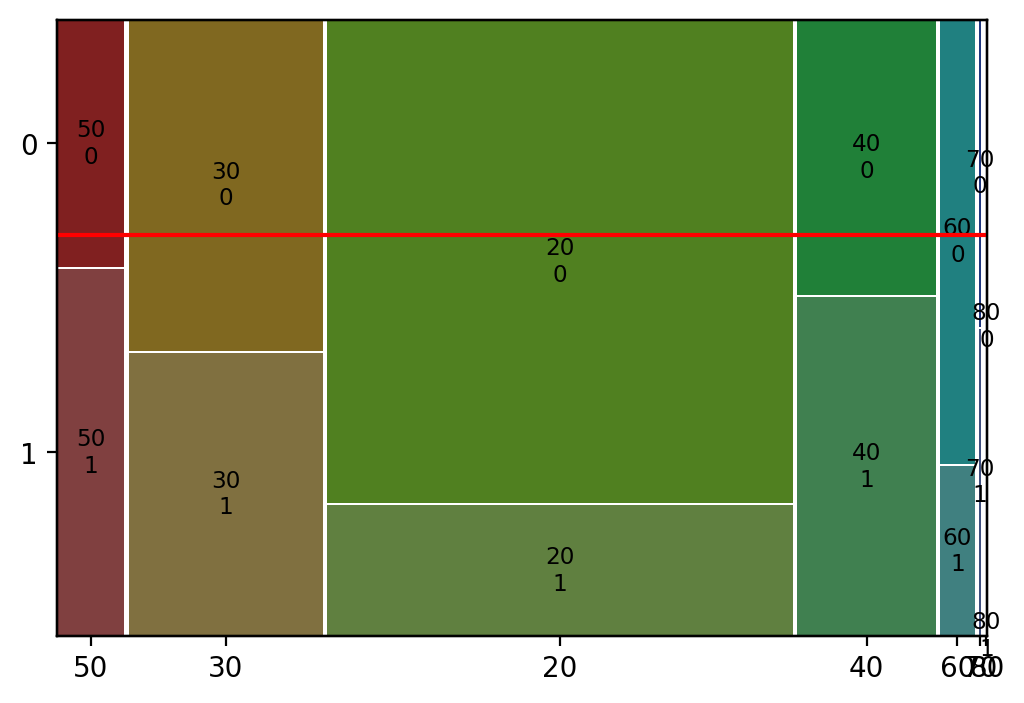

In [24]:
mosaic(diabetes, ['AgeGroup', 'Outcome'])
plt.axhline(1-diabetes['Outcome'].mean(), color='r')
plt.show()


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**üìå ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Î∂ÑÏÑùÌïòÎäî Î∞©Î≤ï**

- Ìïú Í∞ÄÏßÄÎßå Í∏∞ÏñµÌïòÏÑ∏Ïöî! Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ï∞∏Ïùº Îïå ÎÇòÏò¨ Í∑∏ÎûòÌîÑÏùò Î™®Ïñë(ÏïÑÎûò Í∑∏Î¶º)
- Ïó¨Í∏∞ÏÑú Î≤óÏñ¥ÎÇòÎ©¥, 'Ï∞®Ïù¥Í∞Ä ÏûàÎã§'., 'Í¥ÄÎ†®Ïù¥ ÏûàÎã§'Îäî ÎßêÏûÖÎãàÎã§.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

## **4. ÏàòÏπòÌôî**

- Î≤îÏ£ºÌòï ‚Üí Î≤îÏ£ºÌòï Í¥ÄÍ≥ÑÎ•º ÏàòÏπòÏôÄÌï¥ ÎπÑÍµêÌï† ÎïåÎäî **Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï(Chi-Squared Test)** ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- **scipy.stats** ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò **chi2_contingency()** Ìï®ÏàòÎ°ú Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
- Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÄ $x^2$Í≤ÄÏ†ïÏúºÎ°úÎèÑ Î∂àÎ¶ΩÎãàÎã§.

<img src = "https://github.com/Jangrae/img/blob/master/chi2.png?raw=true" width=300 align="left"/>

- Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâÏùÄ
    - ÌÅ¥ÏàòÎ°ù Í∏∞ÎåÄÎπàÎèÑÎ°úÎ∂ÄÌÑ∞ Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.
    - Í≥ÑÏÇ∞ÏãùÏúºÎ°ú Î≥º Îïå, Î≤îÏ£ºÏùò ÏàòÍ∞Ä ÎäòÏñ¥ÎÇ† ÏàòÎ°ù Í∞íÏùÄ Ïª§ÏßÄÍ≤å ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
    - Î≥¥ÌÜµ, **ÏûêÏú†ÎèÑÏùò 2~3Î∞∞ Î≥¥Îã§ ÌÅ¨Î©¥, Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î¥ÖÎãàÎã§.**

- Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ: Î≤îÏ£ºÏùò Ïàò - 1

- Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏóêÏÑúÎäî
    - x Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ √ó y Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ
    - Ïòà: BPStatus ‚Üí Outcome
        - BPStatus: Î≤îÏ£ºÍ∞Ä 3Í∞ú, Outcome: 2Í∞ú
        - (3-1) * (2-1) = 2
        - Í∑∏Îü¨ÎØÄÎ°ú, 2Ïùò 2 ~ 3Î∞∞Ïù∏ 4 ~ 6 Î≥¥Îã§ Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâÏù¥ ÌÅ¨Î©¥ Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î≥ºÏàò ÏûàÏäµÎãàÎã§.


- **BPStatus ‚Üí Outcome** Í¥ÄÍ≥ÑÎ•º Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏÇ¨Ïö©Ìï¥ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.
- Ïö∞ÏÑ† ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Í≥† ÌôïÏù∏Ìï©ÎãàÎã§.

In [ ]:
table = pd.crosstab(diabetes['BPStatus'], diabetes['Outcome'])
table

- Ïù¥ ÍµêÏ∞®ÌëúÎ•º ÏÇ¨Ïö©Ìï¥ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [ ]:
result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])
print('* Í∏∞ÎåÄÎπàÎèÑ:\n',result[3])

[ÎßÅÌÅ¨ ÌÖçÏä§Ìä∏](https://)<img src = "https://github.com/Jangrae/img/blob/master/chi01.png?raw=true" width=800 align="left"/>

üìå **Í∏∞ÎåÄÎπàÎèÑ Í≥ÑÏÇ∞**

**1)** $\frac{481 \times 205}{733}$
**2)** $\frac{481 \times 86}{733}$
**3)** $\frac{481 \times 442}{733}$
**4)** $\frac{252 \times 205}{733}$
**5)** $\frac{252 \times 86}{733}$
**6)** $\frac{252 \times 442}{733}$



üìå **Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞**

$\large x^2$$=\frac{115-134.5225)^2}{134.5225}+\frac{(70-56.4338)^2}{56.4338}+\frac{(296-290.0437)^2}{290.0437}+\frac{(90-70.4775)^2}{70.4775}+\frac{(16-29.5662)^2}{29.5662}+\frac{(146-151.9563)^2}{151.9563}=18.0827$

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

diabetes Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îã§Ïùå Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏúºÎ°ú ÌôïÏù∏ÌïòÏÑ∏Ïöî.

**1Ô∏è‚É£ BMIStatus ‚Üí Outcome**

In [ ]:
table = pd.crosstab(diabetes['BMIStatus'], diabetes['Outcome'])
display(table)

result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑxÎüâ:', result[0])
print('* p-value:', result[1])

Outcome        0    1
BMIStatus            
Normal        95    7
Obese        253  219
Overweight   139   40
Underweight    4    0

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 77.05650618834986
* p-value: 1.3130075700310087e-16
* Í∏∞ÎåÄÎπàÎèÑ:
 [[ 66.15852048  35.84147952]
 [306.14531044 165.85468956]
 [116.10171731  62.89828269]
 [  2.59445178   1.40554822]]


**2Ô∏è‚É£ AgeGroup ‚Üí Outcome**

In [28]:
table = pd.crosstab(diabetes['AgeGroup'], diabetes['Outcome'])
display(table)

result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])


Outcome     0   1
AgeGroup         
20        312  84
30         89  76
40         53  65
50         23  34
60         21   8
70          1   1
80          1   0

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 79.65305561212087
* p-value: 4.213801887597233e-15


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>